# <font color=aqua>**CLASIFICACION DE VINOS MEDIANTE ALGORITMOS DE MACHINE LEARNING**</font>

Utilizando modelos de clasificación de Machine Learning, compare y determine la clasificación de las calidades de vino, utilizando el dataset **wineq.csv** y exprese sus conclusiones producto en estudio.

# <font color=dark red>**1. Análisis del negocio**</font>  
Para establecer la calidad del vino, se requiere reconocer las características principales que puedan ayudar a clasificarlos.

Para lo anterior, se debe leer los datos.

In [3]:
# Importar algunas librerias base
import pandas as pd
import numpy as np

In [4]:
# Cargar los datos del archivo  wineq.csv

df = pd.read_csv("../artifacts/data_ingestion/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# <font color=dark red>**2. Comprension de datos / Análisis exploratorio de datos**</font>  
Analice los datos y determine las características que utilizará, para la clasificación.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# <font color=dark red>**3. Preprocesamiento de datos**</font> 
Utilice los modelos o estrategias que Ud. considere necesarias

In [7]:
# verificacion de valores nulos
df.isnull().values.any()

False

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# analizar la columna "quality"
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
#pip install matplotlib
#!pip install seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

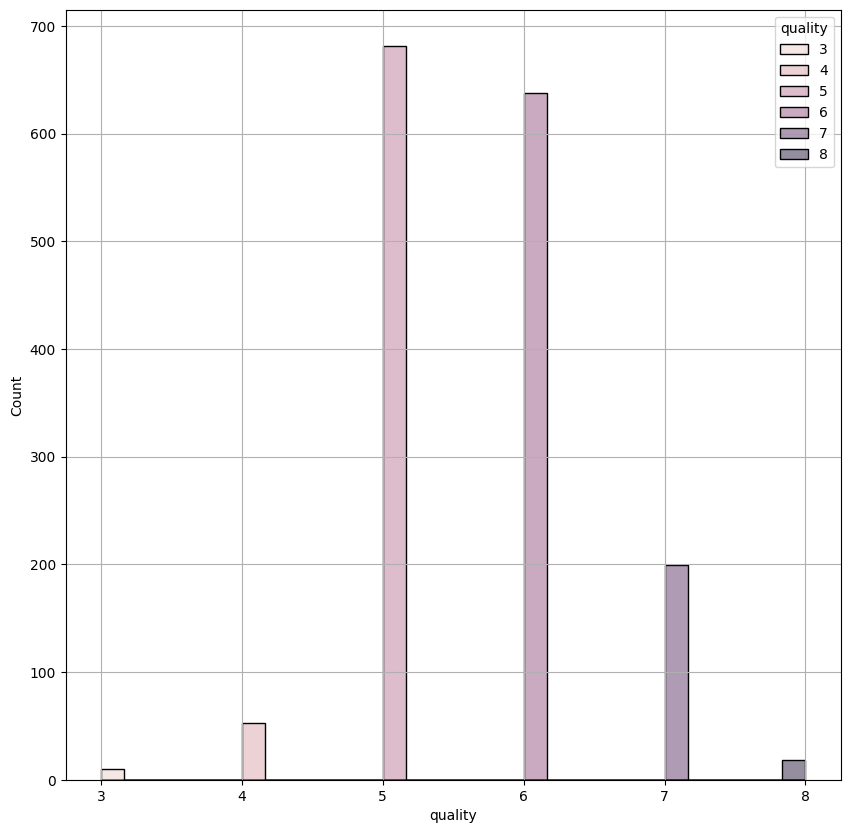

In [17]:
# analizando "quality"
plt.figure(1, figsize=(10,10))
sns.histplot(data = df, x = "quality", kde = True, hue = "quality")
plt.grid()
plt.show()

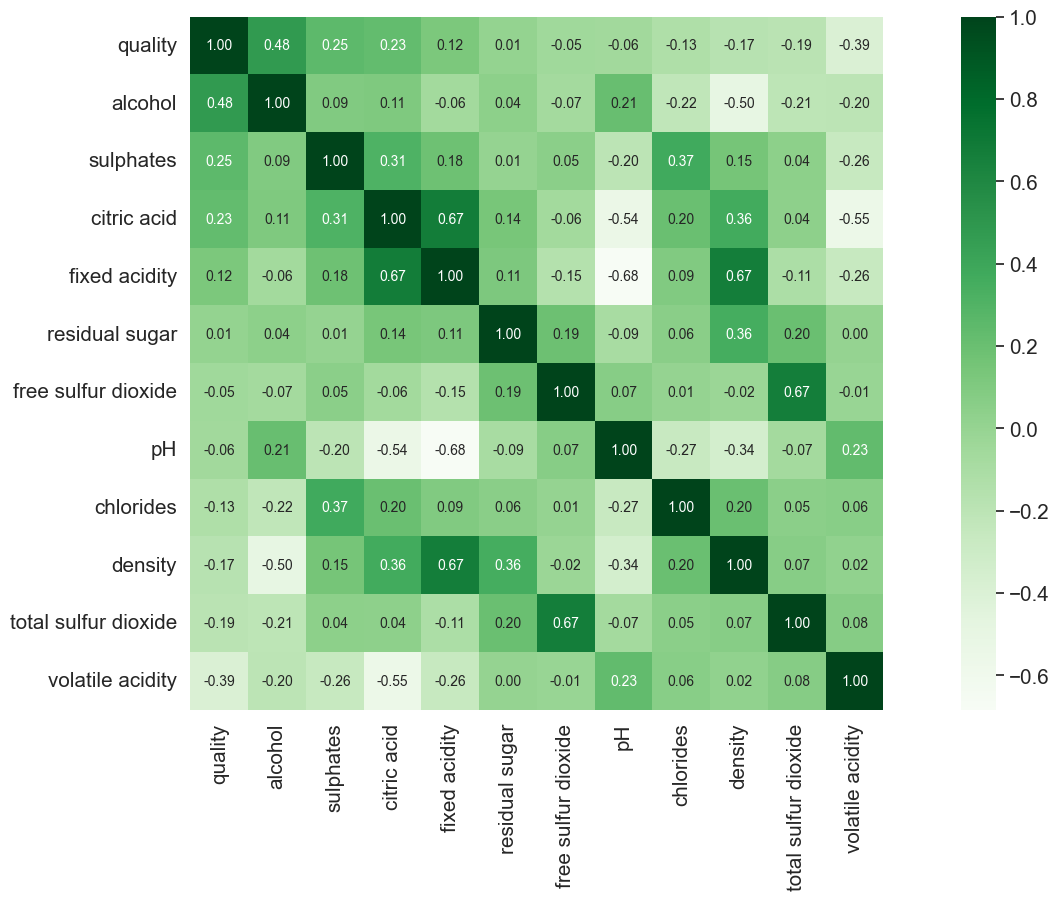

In [18]:
# OBSERVAR EL GRADO DE CORRELACION ENTRE LAS VARIABLES
corr = df.corr()
plt.figure(figsize=(20, 9))
columnas = corr.nlargest(12 , 'quality')['quality'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

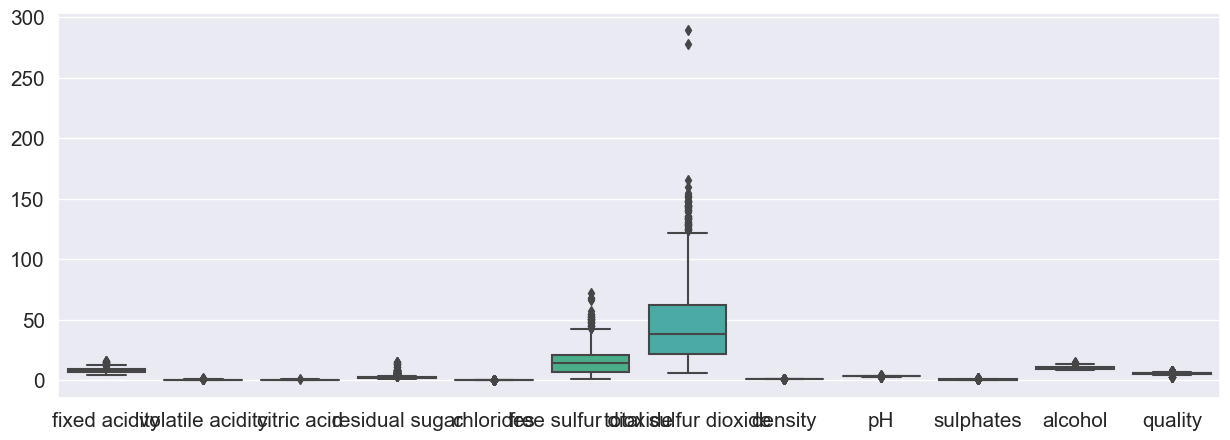

In [19]:
# BUSQUEDA DE VALORES ATIPICOS (OUTLIERS) mediante gráficas
#boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

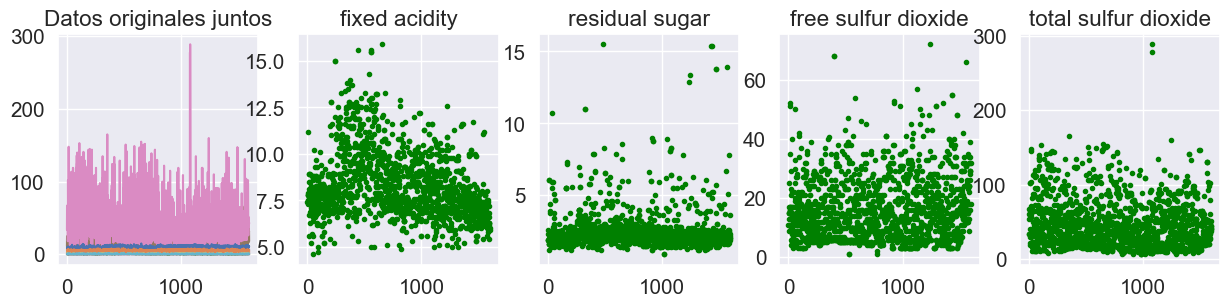

In [20]:

fig = plt.figure(figsize=(15,3)) # tamaño de la grafica
ax1 = fig.add_subplot(1,5,1) # (NRO filas ,  nro de graficos o columnas, orden en que apareceran los graficos)
ax2 = fig.add_subplot(1,5,2) # (nro de filas, nro de columnas, ubicaion del grafico)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

ax1.set_title("Datos originales juntos")
ax1.plot(df)  # 1

ax2.set_title("fixed acidity") # 2
ax2.plot(df["fixed acidity"], linewidth=0,marker="o",color="green", markersize=3)

ax3.set_title("residual sugar") # 3
ax3.plot(df["residual sugar"], linewidth=0,marker="o",color="green", markersize=3)

ax4.set_title("free sulfur dioxide") # 4
ax4.plot(df["free sulfur dioxide"], linewidth=0,marker="o",color="green", markersize=3)

ax5.set_title("total sulfur dioxide") # 5
ax5.plot(df["total sulfur dioxide"], linewidth=0,marker="o",color="green", markersize=3)
#total sulfur dioxide
plt.show()

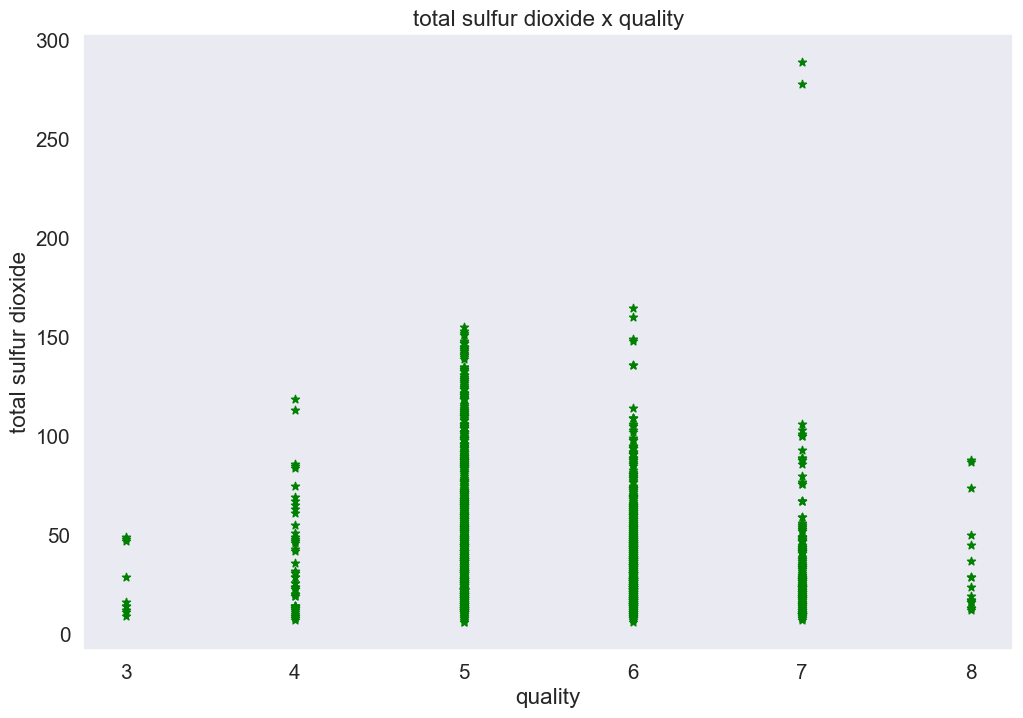

In [21]:
# visualizacion de una caracteristica respecto de la variable quality
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("total sulfur dioxide x quality")
plt.ylabel("total sulfur dioxide")
plt.xlabel("quality")
plt.scatter(df["quality"], df["total sulfur dioxide"],color="green", marker="*")
plt.grid()
plt.show()

In [ ]:
# instalar libreria Winsorizer
!pip install feature-engine

In [24]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=['fixed acidity', 'volatile acidity', 
                                     'citric acid', 'residual sugar',
                                     'chlorides', 'free sulfur dioxide', 
                                     'total sulfur dioxide', 'density',
                                     'pH', 'sulphates']) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo 
windsoriser.fit(df)
# transformar en base a los datos entrenados
df = windsoriser.transform(df)

In [ ]:
#df_nooutlier = df.copy()
#for col in df.drop('quality',axis = 1).columns:
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile (0.75)
#    IQR = Q3 - Q1
#    df_nooutlier = df_nooutlier[~(df_nooutlier[col]<(Q1 - 1.5*IQR))]
#    df_nooutlier = df_nooutlier[~(df_nooutlier[col]>(Q3 + 1.5*IQR))]

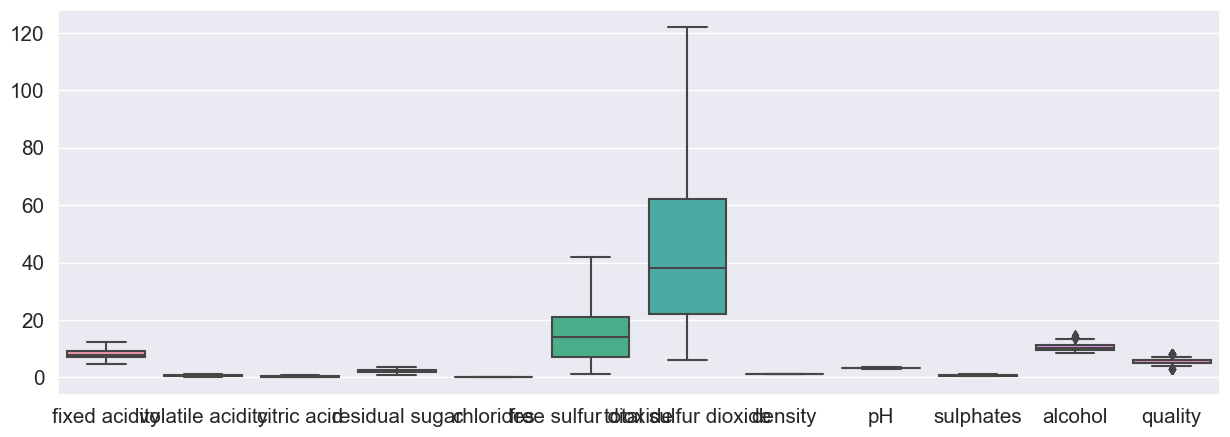

In [25]:
#boxplot general
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# TECNICA DE ETIQUETADO (bipolaridad)
# $quality$ > 6 ? "good" : "bad"

In [27]:
bins = (2, 5.9, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [28]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
# APLICACION DE ONE-HOT-ENCODING

In [29]:
new_df = df.copy()
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [30]:
dummy_quality = pd.get_dummies(new_df["quality"],prefix = "quality")

In [31]:
dummy_quality.head()

,quality_bad,quality_good
0,True,False
1,True,False
2,True,False
3,False,True
4,True,False


In [32]:
new_df = new_df.drop(["quality"],axis=1)

In [33]:
new_df_2 = pd.concat([new_df,dummy_quality],axis = 1)

In [34]:
new_df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bad,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,False,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,True,False


In [35]:
new_df_2 = new_df_2.drop(["quality_bad"],axis=1)

In [36]:
new_df_2['quality_good'].value_counts()

quality_good
True     855
False    744
Name: count, dtype: int64

# <font color=dark red>**4. Modelado**</font> 
Aplique por lo menos 3 modelos de clasificación de Machine Learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# =========== SEPARACION DE DATOS =========== 
datos = new_df_2 # 
# separamos los datos en entrenamiento y prueba (este sirve para probar los algoritmos)
X_train, X_test, y_train, y_test = train_test_split(datos[['fixed acidity', 'volatile acidity', 'citric acid', 
                                                           'residual sugar', 'chlorides', 'free sulfur dioxide', 
                                                           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], datos["quality_good"], test_size = 0.2)

# =========== APLICANDO NORMALIZACION A LOS DATOS DE X ==================
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
# =========== TRANSFORMANDO =========== 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
type(y_train)

pandas.core.series.Series

## ALGORITMOS DE APRENDIZAJE SUPERVISADO

In [39]:
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn import tree                              # ARBOL DE DECISION
from sklearn.ensemble import RandomForestClassifier   # RANDOM FOREST
from sklearn.naive_bayes import GaussianNB            # NAIVE BAYES
from sklearn.svm import SVC                           # SVM-MAQUINA DE VECTOR DE SOPORTE
from sklearn.metrics import confusion_matrix          # metricas 
from sklearn.metrics import precision_score           # precisión

In [40]:
# seleccion de modelos
clasificador_knn = KNeighborsClassifier(n_neighbors=100)
clasificador_dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth = 3)
clasificador_rf = RandomForestClassifier(n_estimators=100)
clasificador_gnb = GaussianNB()
clasificador_svc = SVC(C = 100, kernel = 'linear', random_state=50)

In [41]:
# crear un array que almacene las funciones
clasificadores = [
    ("knn",clasificador_knn),
    ("dtree",clasificador_dtree),
    ("rf",clasificador_rf),
    ("gnb",clasificador_gnb),
    ("svc",clasificador_svc)]

In [42]:
values = []
scores = []
models_probabilities = []
# iterar las functiones
for nombre, clasificador in clasificadores:
  # entrenar
  clasificador.fit(X_train, y_train)
  
  # realizar prediccion(construir y_pred)
  y_pred = clasificador.predict(X_test)
  models_probabilities.append(y_pred)
  
  # evaluar las metricas de los modelos
  matriz = confusion_matrix(y_test, y_pred)
  values.append((nombre,matriz))
  print(f"{nombre} = Matriz de Confusión")
  print(matriz)
  #score
  precision = precision_score(y_test, y_pred)
  scores.append((nombre,precision))

knn = Matriz de Confusión
[[108  37]
 [ 39 136]]
dtree = Matriz de Confusión
[[100  45]
 [ 47 128]]
rf = Matriz de Confusión
[[122  23]
 [ 31 144]]
gnb = Matriz de Confusión
[[117  28]
 [ 54 121]]
svc = Matriz de Confusión
[[114  31]
 [ 46 129]]


# <font color=dark red>**5. Visualización de datos clasificados**</font>
Muestre los resultados de las clasificaciones obtenidas con cada modelo 

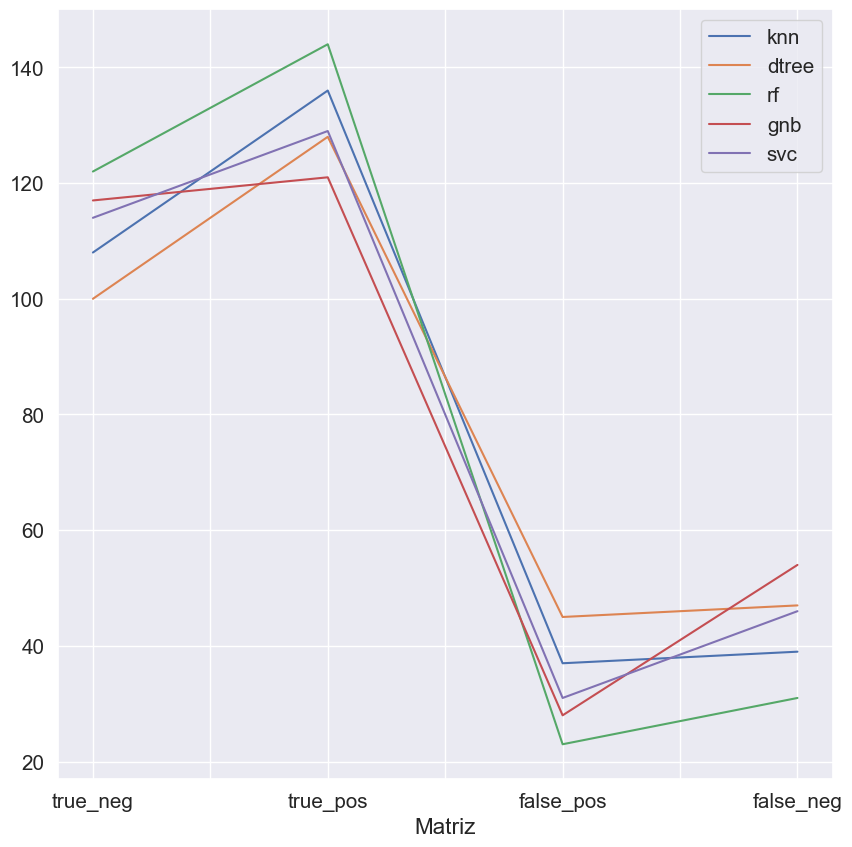

In [43]:

columns = ["true_neg","true_pos","false_pos","false_neg"]
diccionario={"Matriz":columns}
# agregar elementos al dic
for nombre, matriz in values:
  values_pred = [matriz[0][0], matriz[1][1],matriz[0][1], matriz[1][0]]
  diccionario[f"{nombre}"]=values_pred

# graficar
df_values = pd.DataFrame(diccionario)
fig, ax = plt.subplots(1, figsize=(10,10))

df_values.plot(x = 'Matriz', y = 'knn', ax = ax)
df_values.plot(x = 'Matriz', y = 'dtree', ax = ax)
df_values.plot(x = 'Matriz', y = 'rf', ax = ax)
df_values.plot(x = 'Matriz', y = 'gnb', ax = ax)
df_values.plot(x = 'Matriz', y = 'svc', ax = ax)

plt.show()


# <font color=dark red>**6. Evaluación / Desempeño de modelos** </font> 
Utilice metricas para obtener conclusiones y proponer el mejor modelo.

In [44]:
print("\t PRECISION")
print("===========================")
for nombre, score in scores:
  print(f"{nombre} \t", score)

	 PRECISION
knn 	 0.7861271676300579
dtree 	 0.7398843930635838
rf 	 0.8622754491017964
gnb 	 0.8120805369127517
svc 	 0.80625


In [45]:
# Curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score

models_probs = []
models_fpr_tpr = []
for y_pred in models_probabilities:
  # Calculando auc score
  auc = roc_auc_score(y_test, y_pred)
  models_probs.append(auc)
  # Calculando la curva de ROC -> fpr,tpr
  model_fpr, model_tpr, _ = roc_curve(y_test, y_pred)
  models_fpr_tpr.append((model_fpr, model_tpr))

In [46]:
r_probs = [0 for _ in range(len(y_test))] # probabilidad de referencia base
models_probs.append(roc_auc_score(y_test, r_probs))
model_fpr_, model_tpr_, _ = roc_curve(y_test, r_probs)
models_fpr_tpr.append((model_fpr_, model_tpr_))

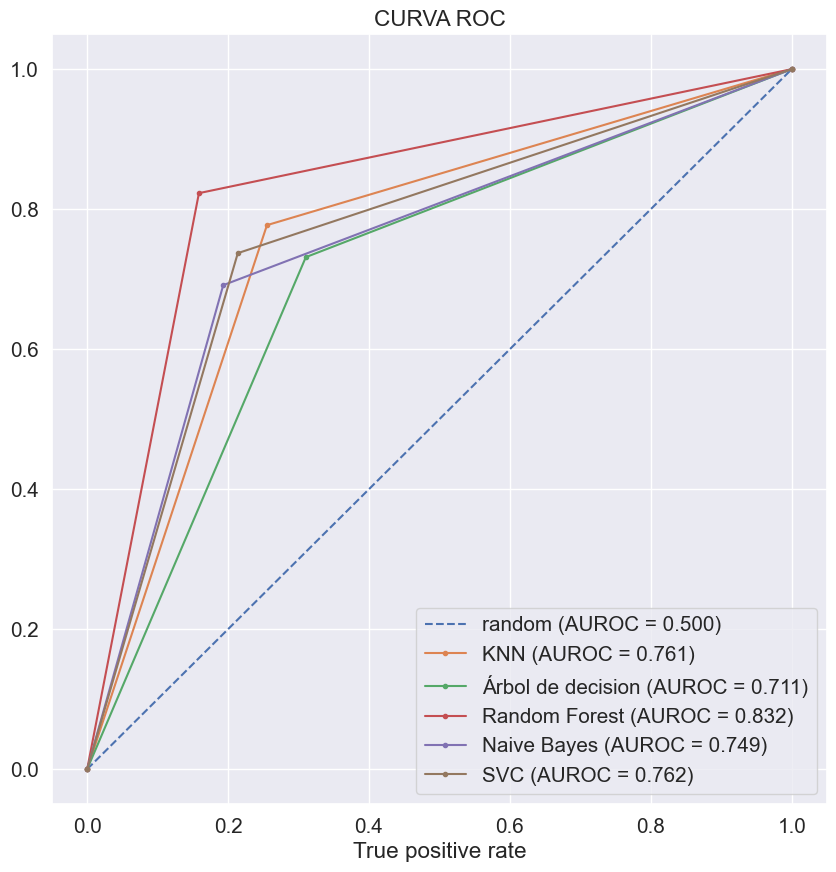

In [48]:
# graficando CURVA ROC

auc_knn = models_probs[0]
auc_dtree = models_probs[1]
auc_rf = models_probs[2]
auc_gnb = models_probs[3]
auc_svc = models_probs[4]
auc_r = models_probs[5]

knn_fpr, knn_tpr = models_fpr_tpr[0]
dtree_fpr, dtree_tpr = models_fpr_tpr[1]
rf_fpr, rf_tpr = models_fpr_tpr[2]
gnb_fpr, gnb_tpr = models_fpr_tpr[3]
svc_fpr, svc_tpr = models_fpr_tpr[4]
r_fpr, r_tpr = models_fpr_tpr[5]

plt.figure(figsize=(10,10))

plt.plot(r_fpr, r_tpr,linestyle='--', label="random (AUROC = %0.3f)" % auc_r)
plt.plot(knn_fpr, knn_tpr,marker='.', label="KNN (AUROC = %0.3f)" % auc_knn)
plt.plot(dtree_fpr, dtree_tpr,marker='.', label="Árbol de decision (AUROC = %0.3f)" % auc_dtree)
plt.plot(rf_fpr, rf_tpr,marker='.', label="Random Forest (AUROC = %0.3f)" % auc_rf)
plt.plot(gnb_fpr, gnb_tpr,marker='.', label="Naive Bayes (AUROC = %0.3f)" % auc_gnb)
plt.plot(svc_fpr, svc_tpr,marker='.', label="SVC (AUROC = %0.3f)" % auc_svc)

plt.title("CURVA ROC")
plt.xlabel("False positive rate")
plt.xlabel("True positive rate")

plt.legend()
plt.show()